In [4]:
import sys
from pathlib import Path

exp_dir = str(Path("..").resolve())
if exp_dir not in sys.path:
    sys.path.insert(0, exp_dir)

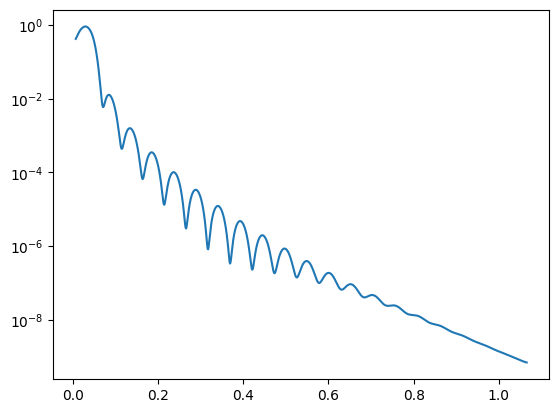

In [5]:
import matplotlib.pyplot as plt
from reflecto.math_utils import powerspace
from reflecto.physics_utils import tth2q
from reflecto.simulate.simul_genx import ParamSet, param2refl

qs = powerspace(tth2q(0.1), tth2q(15), 1000, 0.95)
param = ParamSet(120, 4, 41)
reference_refl = param2refl(qs, [param])

plt.plot(qs, reference_refl)
plt.yscale("log")

[Inference] Device: cuda
[Inference] Grid Generation: Power=0.95, Points=1000
[Inference] Model loaded from D:\data\XRR_AI\mask\test\best.pt
>>> NN Prediction:
Thickness : 135.43 Å
Roughness : 3.05 Å
SLD : 10.556 (10⁻⁶ Å⁻²)


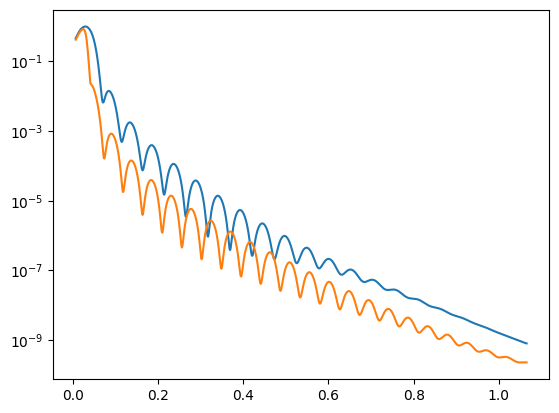

In [6]:
from fitting_engine import GenXFitter
from inference import XRRInferenceEngine

weights_path = r"D:\data\XRR_AI\mask\test"
inference_engine = XRRInferenceEngine(exp_dir=weights_path)

pred_d, pred_sig, pred_sld = inference_engine.predict(qs, reference_refl)


print(">>> NN Prediction:")
print(f"Thickness : {pred_d:.2f} Å")
print(f"Roughness : {pred_sig:.2f} Å")
print(f"SLD : {pred_sld:.3f} (10⁻⁶ Å⁻²)")

param = ParamSet(pred_d, pred_sig, pred_sld)
new_sim_refl = param2refl(qs, [param])

plt.plot(qs, reference_refl / reference_refl.max())
plt.plot(qs, new_sim_refl)
plt.yscale("log")


[GenX] Step 1: Fitting I0 & Sample Length...
  -> I0: 1.128, Sample Len: 50.00 mm
[GenX] Step 2: Fitting All Params (Log)...

----------------------------------------
FINAL ANALYSIS RESULT
----------------------------------------
set_f_d        : 115.1267
set_f_sig      : 5.5162
set_f_sld      : 34.6672
set_s_d        : 5.0000
set_s_sig      : 2.1154
set_s_sld      : 18.7334
set_i0         : 1.8259
set_s_len      : 50.0000


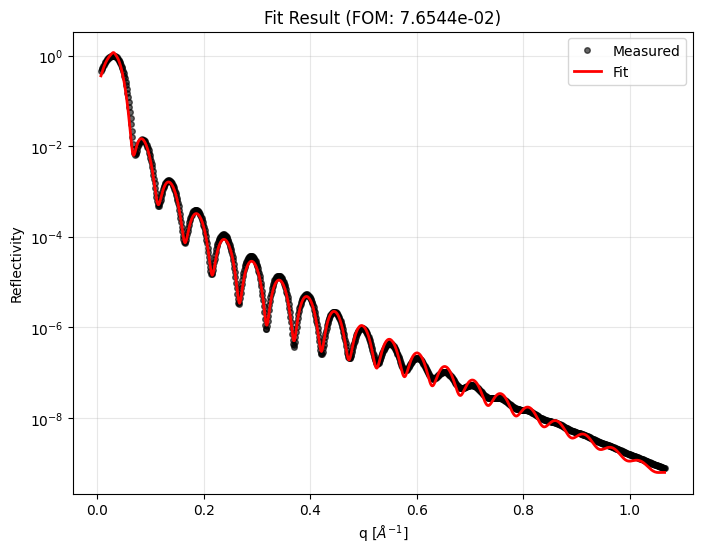

nn_preds: (np.float32(135.42697), np.float32(3.0524287), np.float32(10.55597))
final_params: {'set_f_d': 115.12668929202249, 'set_f_sig': 5.516182424301382, 'set_f_sld': 34.6672116600382, 'set_s_d': 5.000000000126329, 'set_s_sig': 2.1154089642369867, 'set_s_sld': 18.73343398390089, 'set_i0': 1.8259337825074113, 'set_s_len': 49.999999980229305}
fitter: <fitting_engine.GenXFitter object at 0x000002C3C78DAF90>


In [7]:
nn_initial_params = ParamSet(pred_d, pred_sig, pred_sld)
nn_initial_params = ParamSet(120, 4, 41)
fitter = GenXFitter(qs, reference_refl, nn_initial_params)

# 피팅 실행
final_results = fitter.run(verbose=True)
    # ---------------------------------------------------------

print("\n" + "-"*40)
print("FINAL ANALYSIS RESULT")
print("-"*40)
for param_name, value in final_results.items():
    print(f"{param_name:15s}: {value:.4f}")
print("="*40)


fitter.plot()

# 결과 반환
result = {
"nn_preds": (pred_d, pred_sig, pred_sld),
"final_params": final_results,
"fitter": fitter,
}

for key, val in result.items():
    print(f"{key}: {val}")